# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import itertools
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle
matplotlib.rc("lines", markeredgewidth=0.5)
from google.colab import drive
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from scipy import sparse


## 1.1 Reading Data

In [2]:
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
## reading the data matrices with BOW word embeddings (Set 1)

with open('/content/drive/My Drive/Assignments/X_train_bow_4', 'rb') as f1:
    X_train_bow = pickle.load(f1)

with open('/content/drive/My Drive/Assignments/Y_train_4', 'rb') as f2:
  Y_train = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignments/X_cv_bow_4', 'rb') as f3:
  X_cv_bow = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignments/Y_cv_4', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignments/X_test_bow_4', 'rb') as f5:
  X_test_bow = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignments/Y_test_4', 'rb') as f6:
  Y_test = pickle.load(f6)

  
print("Training Data Dimensions:", X_train_bow.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_bow.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_bow.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 10102)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 10102)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 10102)
Target Dimensions: (21850,)


In [5]:
## reading the data matrices with TFIDF word embeddings (Set 2)

with open('/content/drive/My Drive/Assignments/X_train_tfidf_4', 'rb') as f1:
    X_train_tfidf = pickle.load(f1)

  
with open('/content/drive/My Drive/Assignment2/X_cv_tfidf_4', 'rb') as f3:
  X_cv_tfidf = pickle.load(f3)
  
  
with open('/content/drive/My Drive/Assignment2/X_test_tfidf_4', 'rb') as f5:
  X_test_tfidf = pickle.load(f5)
  
print("Training Data Dimensions:", X_train_tfidf.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_tfidf.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_tfidf.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 10102)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 10102)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 10102)
Target Dimensions: (21850,)


In [6]:
## reading the data matrices with Avg-W2V word embeddings (Set 3)

with open('/content/drive/My Drive/Assignments/X_train_avgw2v_4', 'rb') as f1:
    X_train_avgw2v = pickle.load(f1)

  
with open('/content/drive/My Drive/Assignments/X_cv_avgw2v_4', 'rb') as f3:
  X_cv_avgw2v = pickle.load(f3)
  
  
with open('/content/drive/My Drive/Assignments/X_test_avgw2v_4', 'rb') as f5:
  X_test_avgw2v = pickle.load(f5)
  

print("Training Data Dimensions:", X_train_avgw2v.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_avgw2v.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_avgw2v.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 702)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 702)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 702)
Target Dimensions: (21850,)


In [7]:
## reading the data matrices with TFIDF-W2V word embeddings (Set 4)

with open('/content/drive/My Drive/Assignments/X_train_tfidfw2v_4', 'rb') as f1:
    X_train_tfidfw2v = pickle.load(f1)

  
with open('/content/drive/My Drive/Assignments/X_cv_tfidfw2v_4', 'rb') as f3:
  X_cv_tfidfw2v = pickle.load(f3)
  
  
with open('/content/drive/My Drive/Assignments/X_test_tfidfw2v_4', 'rb') as f5:
  X_test_tfidfw2v = pickle.load(f5)
  

print("Training Data Dimensions:", X_train_tfidfw2v.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_tfidfw2v.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_tfidfw2v.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 702)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 702)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 702)
Target Dimensions: (21850,)


In [8]:
## reading the data matrices without text features (Set 5)

with open('/content/drive/My Drive/Assignments/X_train_notext_4', 'rb') as f1:
    X_train_notext = pickle.load(f1)

  
with open('/content/drive/My Drive/Assignments/X_cv_notext_4', 'rb') as f3:
  X_cv_notext = pickle.load(f3)
  
  
with open('/content/drive/My Drive/Assignments/X_test_notext_4', 'rb') as f5:
  X_test_notext = pickle.load(f5)
  

print("Training Data Dimensions:", X_train_notext.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_notext.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_notext.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 108)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 108)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 108)
Target Dimensions: (21850,)


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Logistic Regression on <font color='red'> SET 1</font>

In [9]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_bow, Y_train)
  pred_cv = lr.predict_proba(X_cv_bow)
  pred_train = lr.predict_proba(X_train_bow)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.6799492141980127
Train-AUC: 0.683640605720055


C: 0.0001
Validation-AUC: 0.7087179798732204
Train-AUC: 0.7354429966000482


C: 0.001
Validation-AUC: 0.7182698312701601
Train-AUC: 0.7911445006475707


C: 0.01
Validation-AUC: 0.6978733973702851
Train-AUC: 0.836493375403895


C: 0.1
Validation-AUC: 0.6736916778817179
Train-AUC: 0.8656952950047093


C: 1.0
Validation-AUC: 0.6558138781360872
Train-AUC: 0.894322595715549


C: 10
Validation-AUC: 0.6457740674558364
Train-AUC: 0.9010981854656095


C: 100
Validation-AUC: 0.6548785494701521
Train-AUC: 0.8917003482417618


C: 1000
Validation-AUC: 0.6501846312196209
Train-AUC: 0.8972392324975199




In [10]:
print(np.log(list(l2_auc_scores_cv.keys())))
       
print(np.log(list(l2_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


In [12]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_bow, Y_train)
  pred_cv = lr.predict_proba(X_cv_bow)
  pred_train = lr.predict_proba(X_train_bow)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.5974520196117017
Train-AUC: 0.5989135889775898


C: 0.0001
Validation-AUC: 0.6228321273026074
Train-AUC: 0.6209356797945633


C: 0.001
Validation-AUC: 0.6766367965499465
Train-AUC: 0.6756637959533425


C: 0.01
Validation-AUC: 0.7209575870756826
Train-AUC: 0.7518053183416347


C: 0.1
Validation-AUC: 0.6930206061982803
Train-AUC: 0.8342647672734823


C: 1.0
Validation-AUC: 0.6559091279290655
Train-AUC: 0.8965302719766136


C: 10
Validation-AUC: 0.6419385243501984
Train-AUC: 0.9028620720257081


C: 100
Validation-AUC: 0.6393263661341113
Train-AUC: 0.9030410828192331


C: 1000
Validation-AUC: 0.6385048652851132
Train-AUC: 0.903062197187199




In [13]:
print(np.log(list(l1_auc_scores_cv.keys())))
       
print(np.log(list(l1_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


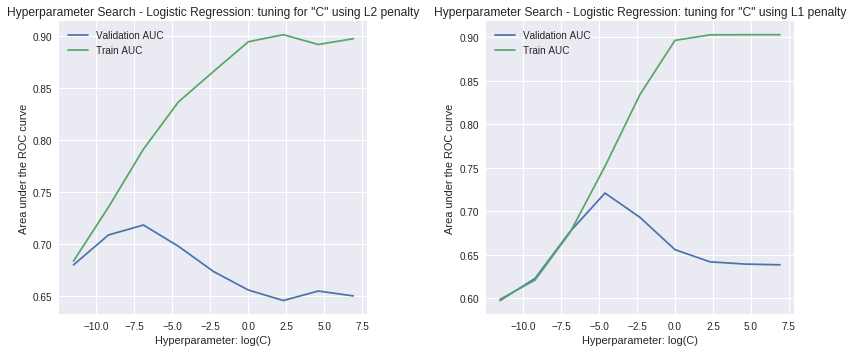

In [22]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.01, penalty='l1')
lr1.fit(X_train_bow, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_bow)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_bow)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.001, penalty='l2')
lr2.fit(X_train_bow, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_bow)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_bow)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


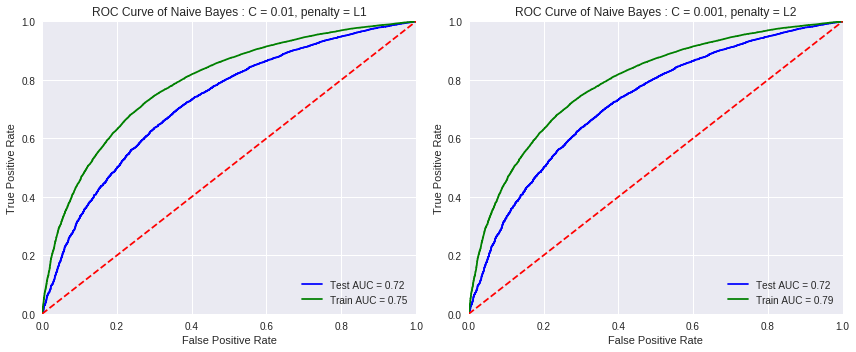

In [28]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.001, penalty = L2')
plt.tight_layout()
plt.show()

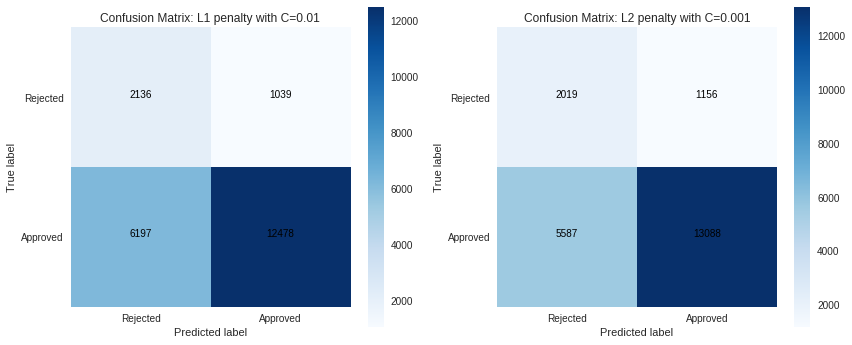

In [29]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_bow)

c_mat1 = confusion_matrix(Y_test, pred_test)

pred_test = lr2.predict(X_test_bow)

c_mat2 = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.01")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.001")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

### 2.4.2 Logistic Regression on <font color='red'> SET 2</font>

In [30]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_tfidf, Y_train)
  pred_cv = lr.predict_proba(X_cv_tfidf)
  pred_train = lr.predict_proba(X_train_tfidf)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.6245634934785412
Train-AUC: 0.6186671162833034


C: 0.0001
Validation-AUC: 0.6323366267503294
Train-AUC: 0.6275920122778663


C: 0.001
Validation-AUC: 0.6506754960706599
Train-AUC: 0.6588584333787694


C: 0.01
Validation-AUC: 0.6965279258076489
Train-AUC: 0.7401609850045954


C: 0.1
Validation-AUC: 0.7108425309960242
Train-AUC: 0.8256993292219976


C: 1.0
Validation-AUC: 0.6819896799517148
Train-AUC: 0.883305698042482


C: 10
Validation-AUC: 0.6548523817510976
Train-AUC: 0.9005449215398003


C: 100
Validation-AUC: 0.6444793112571819
Train-AUC: 0.9034209310440343


C: 1000
Validation-AUC: 0.6442836696968216
Train-AUC: 0.903148679868545




In [31]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_tfidf, Y_train)
  pred_cv = lr.predict_proba(X_cv_tfidf)
  pred_train = lr.predict_proba(X_train_tfidf)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.5974722353192888
Train-AUC: 0.5989305736578574


C: 0.0001
Validation-AUC: 0.6170600585251779
Train-AUC: 0.6127318456860906


C: 0.001
Validation-AUC: 0.625617906397576
Train-AUC: 0.6173332338855912


C: 0.01
Validation-AUC: 0.6603979307074925
Train-AUC: 0.6565975561447281


C: 0.1
Validation-AUC: 0.7168238622831334
Train-AUC: 0.7558549421565773


C: 1.0
Validation-AUC: 0.6772969063187734
Train-AUC: 0.8853095144850887


C: 10
Validation-AUC: 0.6466682074980377
Train-AUC: 0.9035996861425533


C: 100
Validation-AUC: 0.6406013292532118
Train-AUC: 0.9041473323276357


C: 1000
Validation-AUC: 0.6394246799803301
Train-AUC: 0.9041386869479682




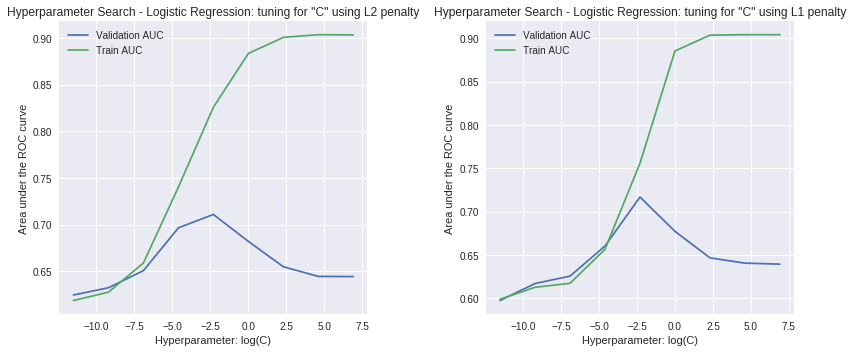

In [32]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.1, penalty='l1')
lr1.fit(X_train_tfidf, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_tfidf)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_tfidf)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.1, penalty='l2')
lr2.fit(X_train_tfidf, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_tfidf)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_tfidf)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


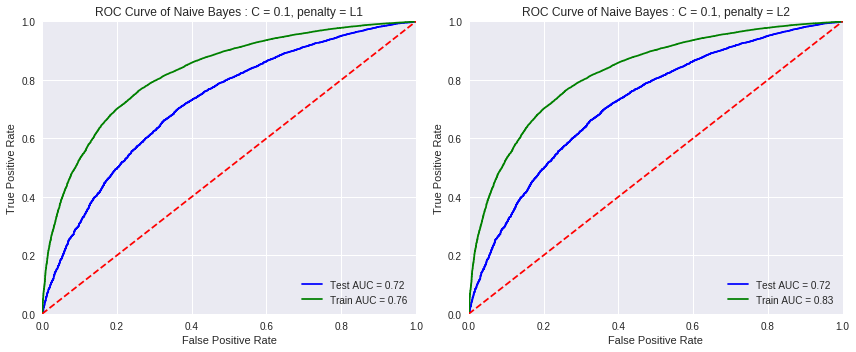

In [37]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.1, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.1, penalty = L2')
plt.tight_layout()
plt.show()

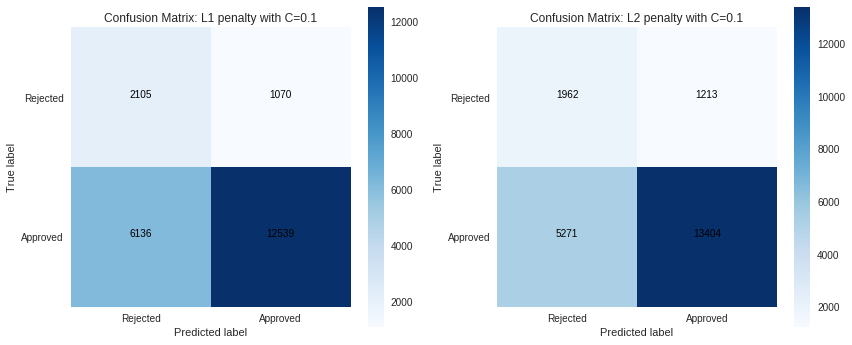

In [38]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_tfidf)

c_mat1 = confusion_matrix(Y_test, pred_test)

pred_test = lr2.predict(X_test_tfidf)

c_mat2 = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.1")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.1")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

### 2.4.3 Logistic Regression on <font color='red'> SET 3</font>

In [39]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_avgw2v, Y_train)
  pred_cv = lr.predict_proba(X_cv_avgw2v)
  pred_train = lr.predict_proba(X_train_avgw2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.6286484223427593
Train-AUC: 0.6230807340838583


C: 0.0001
Validation-AUC: 0.6547602136208612
Train-AUC: 0.6512769819217289


C: 0.001
Validation-AUC: 0.67759949038103
Train-AUC: 0.6889719197897726


C: 0.01
Validation-AUC: 0.6933864964180073
Train-AUC: 0.7192729143400172


C: 0.1
Validation-AUC: 0.7037498464671598
Train-AUC: 0.7367444205025805


C: 1.0
Validation-AUC: 0.7057133234808173
Train-AUC: 0.7408713664544885


C: 10
Validation-AUC: 0.7052654082036504
Train-AUC: 0.7412855086641652


C: 100
Validation-AUC: 0.704839064565677
Train-AUC: 0.7413478214386363


C: 1000
Validation-AUC: 0.7051186682286295
Train-AUC: 0.741177276480275




In [40]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_avgw2v, Y_train)
  pred_cv = lr.predict_proba(X_cv_avgw2v)
  pred_train = lr.predict_proba(X_train_avgw2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.5974685021049958
Train-AUC: 0.5989282312093213


C: 0.0001
Validation-AUC: 0.617053296476647
Train-AUC: 0.612726936604565


C: 0.001
Validation-AUC: 0.6256416880291931
Train-AUC: 0.618912941921519


C: 0.01
Validation-AUC: 0.6851785493380809
Train-AUC: 0.6919101669026798


C: 0.1
Validation-AUC: 0.7063883132783125
Train-AUC: 0.734517244461142


C: 1.0
Validation-AUC: 0.7053260729359134
Train-AUC: 0.740836405496247


C: 10
Validation-AUC: 0.704780196002555
Train-AUC: 0.7411440568083063


C: 100
Validation-AUC: 0.7048987079468597
Train-AUC: 0.7412970306947078


C: 1000
Validation-AUC: 0.7049517477650241
Train-AUC: 0.7413450245488474




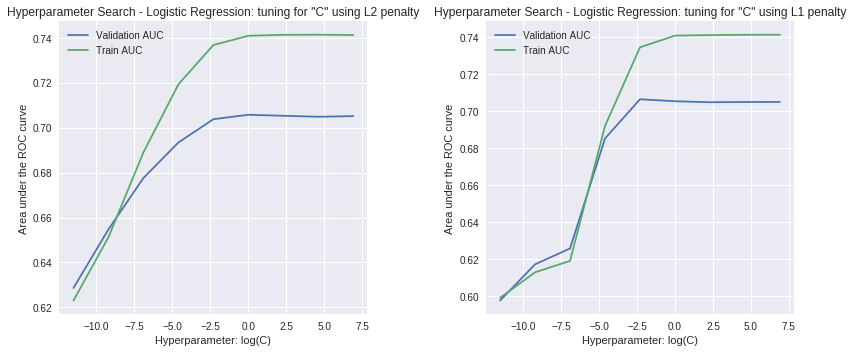

In [41]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.1, penalty='l1')
lr1.fit(X_train_avgw2v, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_avgw2v)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_avgw2v)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.1, penalty='l2')
lr2.fit(X_train_avgw2v, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_avgw2v)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_avgw2v)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


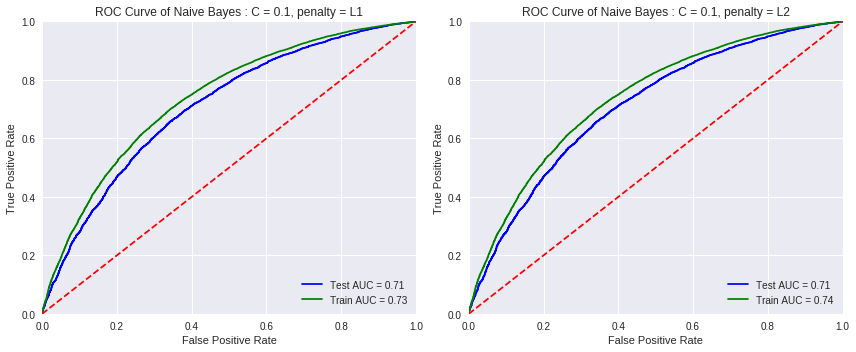

In [44]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.1, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.1, penalty = L2')
plt.tight_layout()
plt.show()

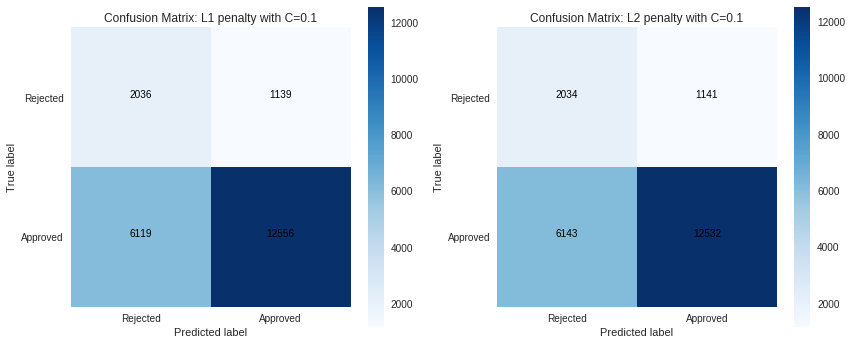

In [45]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_avgw2v)

c_mat1 = confusion_matrix(Y_test, pred_test)

pred_test = lr2.predict(X_test_avgw2v)

c_mat2 = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.1")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.1")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

### 2.4.4 Logistic Regression on <font color='red'> SET 4</font>

In [46]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_tfidfw2v, Y_train)
  pred_cv = lr.predict_proba(X_cv_tfidfw2v)
  pred_train = lr.predict_proba(X_train_tfidfw2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.6311406246354283
Train-AUC: 0.626001967795942


C: 0.0001
Validation-AUC: 0.6654195617787534
Train-AUC: 0.6652615014357705


C: 0.001
Validation-AUC: 0.6925478439146626
Train-AUC: 0.7053928070118185


C: 0.01
Validation-AUC: 0.7013683903286858
Train-AUC: 0.7268252073758052


C: 0.1
Validation-AUC: 0.7013729864085465
Train-AUC: 0.7341880589686488


C: 1.0
Validation-AUC: 0.6997676162150049
Train-AUC: 0.7348530491391156


C: 10
Validation-AUC: 0.6993255120732943
Train-AUC: 0.7347761440246215


C: 100
Validation-AUC: 0.6993118647097227
Train-AUC: 0.7347908978562273


C: 1000
Validation-AUC: 0.6992815411483421
Train-AUC: 0.7348226060063704




In [47]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_tfidfw2v, Y_train)
  pred_cv = lr.predict_proba(X_cv_tfidfw2v)
  pred_train = lr.predict_proba(X_train_tfidfw2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.5974703511026409
Train-AUC: 0.5989289784361261


C: 0.0001
Validation-AUC: 0.6170509896319658
Train-AUC: 0.6127261255360673


C: 0.001
Validation-AUC: 0.6246032205136602
Train-AUC: 0.6186087022832615


C: 0.01
Validation-AUC: 0.7000344177704523
Train-AUC: 0.7050800142279072


C: 0.1
Validation-AUC: 0.70467607102088
Train-AUC: 0.731968604653801


C: 1.0
Validation-AUC: 0.7005979922526999
Train-AUC: 0.7347704855827641


C: 10
Validation-AUC: 0.6996222321715906
Train-AUC: 0.7347819613321823


C: 100
Validation-AUC: 0.6995276867586675
Train-AUC: 0.7347639415630813


C: 1000
Validation-AUC: 0.6994166060239463
Train-AUC: 0.7348321858708666




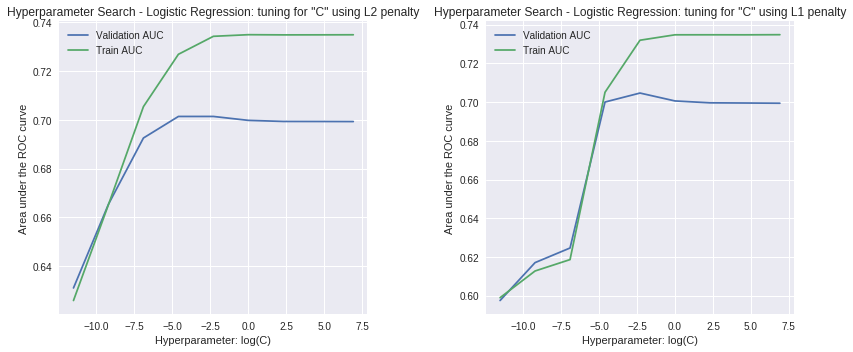

In [48]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.01, penalty='l1')
lr1.fit(X_train_tfidfw2v, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_tfidfw2v)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_tfidfw2v)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.01, penalty='l2')
lr2.fit(X_train_tfidfw2v, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_tfidfw2v)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_tfidfw2v)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


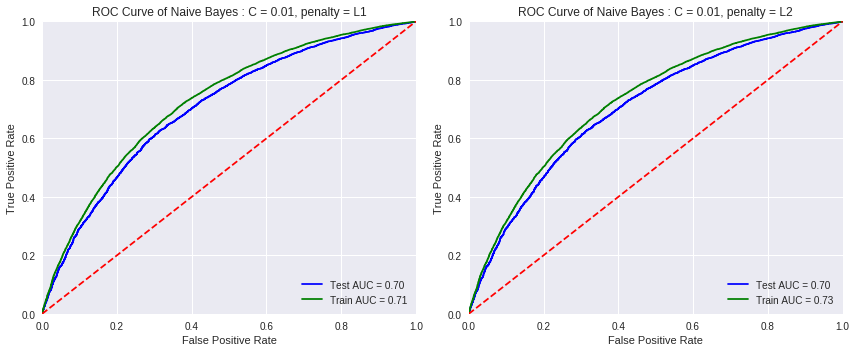

In [52]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L2')
plt.tight_layout()
plt.show()

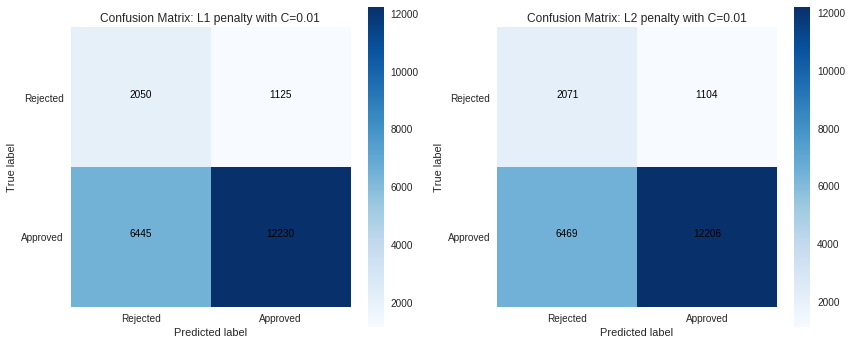

In [53]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_tfidfw2v)

c_mat1 = confusion_matrix(Y_test, pred_test)

pred_test = lr2.predict(X_test_tfidfw2v)

c_mat2 = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.01")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.01")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

## 2.5 Logistic Regression with added Features and No Text features<font color='red'> SET 5</font> 

In [54]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_notext, Y_train)
  pred_cv = lr.predict_proba(X_cv_notext)
  pred_train = lr.predict_proba(X_train_notext)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.6338564323766531
Train-AUC: 0.6356756039224567


C: 0.0001
Validation-AUC: 0.6369882117595369
Train-AUC: 0.6409139287099269


C: 0.001
Validation-AUC: 0.6384130845639073
Train-AUC: 0.646472100706298


C: 0.01
Validation-AUC: 0.6364450290798903
Train-AUC: 0.6504142832194002


C: 0.1
Validation-AUC: 0.6338404253398964
Train-AUC: 0.6504062969354607


C: 1.0
Validation-AUC: 0.6334130955698456
Train-AUC: 0.6503664931991483


C: 10
Validation-AUC: 0.6331584621798537
Train-AUC: 0.6502847210171989


C: 100
Validation-AUC: 0.6336672535033002
Train-AUC: 0.6504836172671338


C: 1000
Validation-AUC: 0.6335197211007171
Train-AUC: 0.6504787800690566




In [55]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_notext, Y_train)
  pred_cv = lr.predict_proba(X_cv_notext)
  pred_train = lr.predict_proba(X_train_notext)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

C: 1e-05
Validation-AUC: 0.6070278463447738
Train-AUC: 0.6204085033240561


C: 0.0001
Validation-AUC: 0.6329161202218269
Train-AUC: 0.6338623818479658


C: 0.001
Validation-AUC: 0.6308867132349931
Train-AUC: 0.633459093382526


C: 0.01
Validation-AUC: 0.6392538502074179
Train-AUC: 0.645557028675354


C: 0.1
Validation-AUC: 0.6372409081043768
Train-AUC: 0.6505504692023709


C: 1.0
Validation-AUC: 0.6335468397328463
Train-AUC: 0.6503997112299424


C: 10
Validation-AUC: 0.6331007206248203
Train-AUC: 0.6503389539607769


C: 100
Validation-AUC: 0.6330665229731354
Train-AUC: 0.650334799491342


C: 1000
Validation-AUC: 0.6330643217854626
Train-AUC: 0.6503322865247626




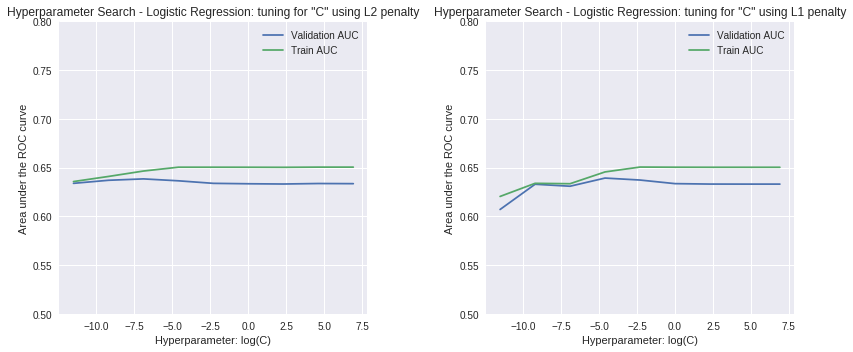

In [58]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
plt.ylim([0.5,0.8])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
plt.ylim([0.5, 0.8])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.01, penalty='l1')
lr1.fit(X_train_notext, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_notext)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_notext)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


In [0]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.01, penalty='l2')
lr2.fit(X_train_notext, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_notext)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_notext)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


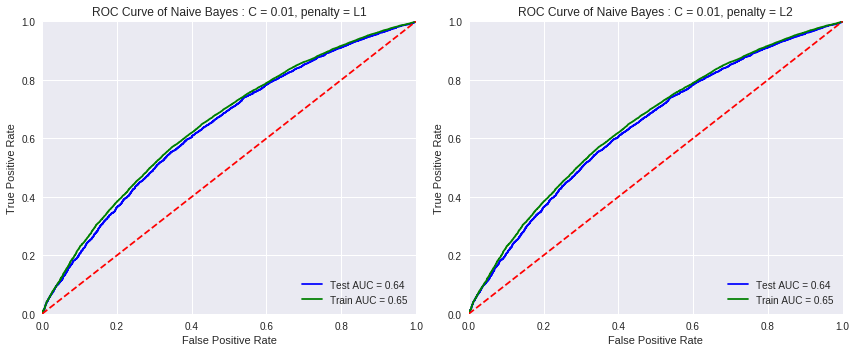

In [61]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L2')
plt.tight_layout()
plt.show()

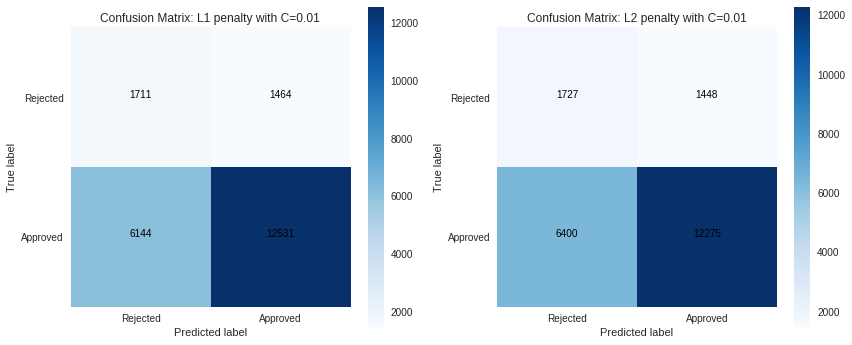

In [62]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_notext)

c_mat1 = confusion_matrix(Y_test, pred_test)

pred_test = lr2.predict(X_test_notext)

c_mat2 = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.01")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.01")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

<h1>3. Conclusion</h1>

In [63]:
# Please compare all your models using Prettytable library
## vectorizer, model, hyperparameter, auc

from prettytable import PrettyTable

x = PrettyTable(["Vectorizer", "Hyperparamter: penalty", "Hyperparameter: C", "AUC"])

x.add_row(["BOW", "L1", "0.01", "0.72"])
x.add_row(["BOW", "L2", "0.001", "0.72"])
x.add_row(["TFIDF", "L1", "0.1", "0.72"])
x.add_row(["TFIDF", "L2", "0.1", "0.72"])
x.add_row(["AVG-W2V", "L1", "0.1", "0.71"])
x.add_row(["AVG-W2V", "L2", "0.1", "0.71"])
x.add_row(["TFIDF-W2V", "L1", "0.01", "0.70"])
x.add_row(["TFIDF-W2V", "L2", "0.01", "0.70"])
x.add_row(["No Vectorizer", "L1", "0.01", "0.64"])
x.add_row(["No Vectorizer", "L2", "0.01", "0.64"])

print(x)

+---------------+------------------------+-------------------+------+
|   Vectorizer  | Hyperparamter: penalty | Hyperparameter: C | AUC  |
+---------------+------------------------+-------------------+------+
|      BOW      |           L1           |        0.01       | 0.72 |
|      BOW      |           L2           |       0.001       | 0.72 |
|     TFIDF     |           L1           |        0.1        | 0.72 |
|     TFIDF     |           L2           |        0.1        | 0.72 |
|    AVG-W2V    |           L1           |        0.1        | 0.71 |
|    AVG-W2V    |           L2           |        0.1        | 0.71 |
|   TFIDF-W2V   |           L1           |        0.01       | 0.70 |
|   TFIDF-W2V   |           L2           |        0.01       | 0.70 |
| No Vectorizer |           L1           |        0.01       | 0.64 |
| No Vectorizer |           L2           |        0.01       | 0.64 |
+---------------+------------------------+-------------------+------+
